<a href="https://colab.research.google.com/github/hugueds/tensorflow-course/blob/master/39_Basic_NN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Complete Tensorflow 2 and Keras Deep Learning Bootcamp

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
df = pd.read_csv('fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


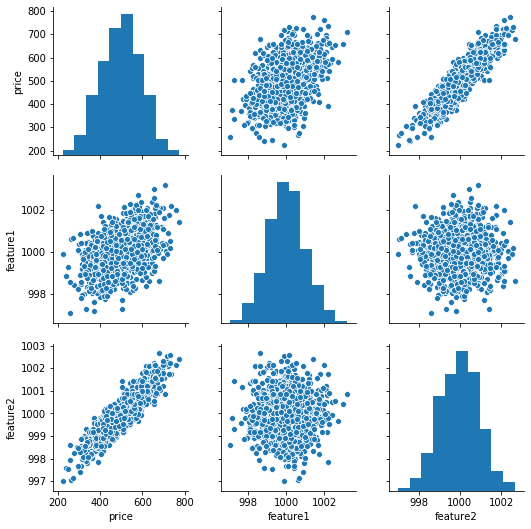

In [8]:
sns.pairplot(df)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
model = Sequential()

model.add(Dense(4 , activation='relu'))
model.add(Dense(4 , activation='relu'))
model.add(Dense(1 , activation='relu'))

model.compile(optimizer='adam',  loss='mse', metrics=['mse'])

In [50]:
model.fit(X_train, y_train, batch_size=10, epochs=100, validation_split=0.15)

Train on 722 samples, validate on 128 samples
Epoch 1/100
722/722 [==============================] - 0s 127us/sample - loss: 24.7557 - mean_squared_error: 24.7557 - val_loss: 23.2810 - val_mean_squared_error: 23.2810
Epoch 2/100
722/722 [==============================] - 0s 122us/sample - loss: 24.3500 - mean_squared_error: 24.3500 - val_loss: 25.2162 - val_mean_squared_error: 25.2162
Epoch 3/100
722/722 [==============================] - 0s 117us/sample - loss: 24.6950 - mean_squared_error: 24.6949 - val_loss: 23.2657 - val_mean_squared_error: 23.2656
Epoch 4/100
722/722 [==============================] - 0s 124us/sample - loss: 24.3999 - mean_squared_error: 24.3999 - val_loss: 23.3436 - val_mean_squared_error: 23.3436
Epoch 5/100
722/722 [==============================] - 0s 119us/sample - loss: 24.2161 - mean_squared_error: 24.2161 - val_loss: 23.7142 - val_mean_squared_error: 23.7142
Epoch 6/100
722/722 [==============================] - 0s 113us/sample - loss: 24.4376 - mean_squar

In [0]:
df_hist = pd.DataFrame(model.history.history)

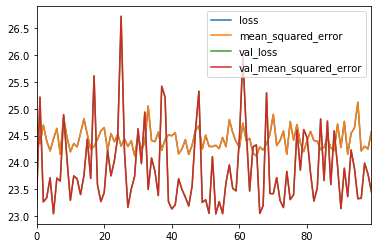

In [52]:
df_hist.plot()

In [54]:
model.evaluate(X_train, y_train)

850/850 [==============================] - 0s 28us/sample - loss: 23.8696 - mean_squared_error: 23.8696


[23.869607974781708, 23.86961]

In [73]:
pred = model.predict(X_test)
pred = pd.Series(pred.reshape(150,))
pred

0      405.730865
1      623.203430
2      592.026245
3      571.801514
4      366.676575
          ...    
145    603.072571
146    384.711243
147    542.108887
148    562.505798
149    453.416107
Length: 150, dtype: float32

In [0]:
pred_df = pd.DataFrame(y_test, columns=['Test',])

In [0]:
pred_df = pd.concat([pred_df, pred], axis=1)

In [0]:
pred_df.columns = ['Test', 'Predict']

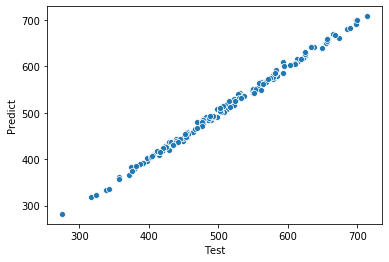

In [80]:
sns.scatterplot(x=pred_df['Test'], y=pred_df['Predict'], data=pred_df)

In [81]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [83]:
pred_df.describe()

,Test,Predict
count,150.000000,150.000000
mean,510.721790,511.115326
std,93.231503,92.582336
min,275.333375,282.079926
25%,442.632702,440.815376
50%,504.926749,509.179260
75%,578.302769,575.748596
max,713.466673,707.984558
